# Regression Analysis

# 1.Dataset Selection and Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv('house_prices.csv')

In [3]:
df.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
df.tail(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [5]:
print('Number of missing values in each columns : ')
df.isnull().sum()

Number of missing values in each columns : 


Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [6]:
print('Number of duplicated rows : ')
df.duplicated().sum()

Number of duplicated rows : 


np.int64(0)

In [16]:
df = df.drop(['Id','Bathrooms', 'Floors', 'Garage','YearBuilt'] , axis=1)
df = df.rename(columns = {'Area' : 'Size' ,'Bedrooms':'Rooms'})
df

,Size,Rooms,Location,Condition,Price
0,-0.659208,5,0,0,-0.811135
1,0.643992,5,0,0,-0.238039
2,0.339673,2,0,2,-0.567739
3,-0.835534,4,2,1,-0.615086
4,0.936675,1,0,1,0.201676
...,...,...,...,...,...
1995,0.967107,5,2,3,-0.507584
1996,0.095323,5,2,3,0.086825
1997,-0.792571,5,1,3,-0.129855
1998,0.550011,3,3,0,-0.787801


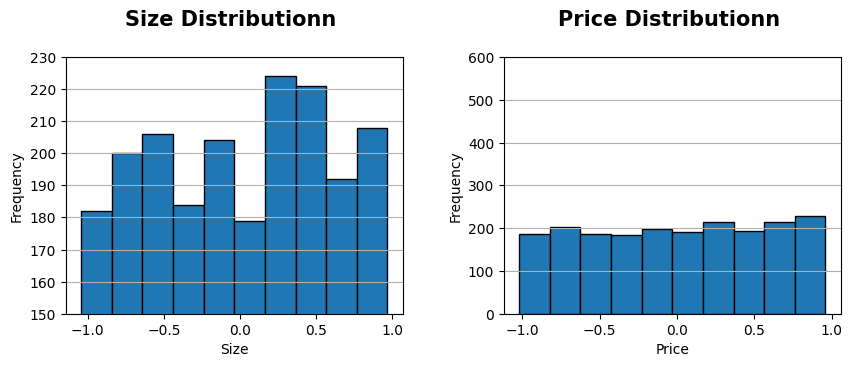

In [17]:
# Analyzing distributions of numerical variables.

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.hist(df['Size'], bins=10 , edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Size')
plt.title('Size Distributionn \n' , fontsize=15 , fontweight='bold')
plt.ylim(150,230)
plt.grid(axis='y')


plt.subplot(2,2,2)
plt.hist(df['Price'], bins=10, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Price Distributionn \n',fontsize=15, fontweight='bold')
plt.ylim(0,600)
plt.grid(axis='y')

plt.subplots_adjust(wspace=0.3, hspace=0.4) 

plt.show()

In [18]:
# Identifying potential outliers that might skew results

# Outliers in Size column
Q1 = df['Size'].quantile(0.25)
Q3 = df['Size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_in_size = df[(df['Size'] < lower_bound) | (df['Size'] > upper_bound)]

print('Outliers in Size column : ', len(outliers_in_size))


# Outliers in Price column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_in_price = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

print('Outliers in Price column : ', len(outliers_in_price))

Outliers in Size column :  0
Outliers in Price column :  0


In [19]:
outliers_in_price = pd.DataFrame(outliers_in_price)
print('Number of Outliers : ' , len(outliers_in_price))

Number of Outliers :  0


In [20]:
# Removing outliers
df = df.drop(outliers_in_price.index)
df.shape

(2000, 5)

# 2. Data Preprocessing

In [21]:
# Normalizing Numerical Data

scaler = RobustScaler()
df[['Size', 'Price']] = scaler.fit_transform(df[['Size', 'Price']])

df

,Size,Rooms,Location,Condition,Price
0,-0.659208,5,0,0,-0.811135
1,0.643992,5,0,0,-0.238039
2,0.339673,2,0,2,-0.567739
3,-0.835534,4,2,1,-0.615086
4,0.936675,1,0,1,0.201676
...,...,...,...,...,...
1995,0.967107,5,2,3,-0.507584
1996,0.095323,5,2,3,0.086825
1997,-0.792571,5,1,3,-0.129855
1998,0.550011,3,3,0,-0.787801


In [22]:
# Encoding Categorical Features

df['Location'] = LabelEncoder().fit_transform(df['Location'])
df['Condition'] = LabelEncoder().fit_transform(df['Condition'])


# Location = {'Downtown':0, 'Rural':1, 'Suburban':2, 'Urban':3}
# Condition = {'Excellent':0, 'Fair':1, 'Good':2, 'Poor':3}

df

,Size,Rooms,Location,Condition,Price
0,-0.659208,5,0,0,-0.811135
1,0.643992,5,0,0,-0.238039
2,0.339673,2,0,2,-0.567739
3,-0.835534,4,2,1,-0.615086
4,0.936675,1,0,1,0.201676
...,...,...,...,...,...
1995,0.967107,5,2,3,-0.507584
1996,0.095323,5,2,3,0.086825
1997,-0.792571,5,1,3,-0.129855
1998,0.550011,3,3,0,-0.787801


# 3. Feature Selection

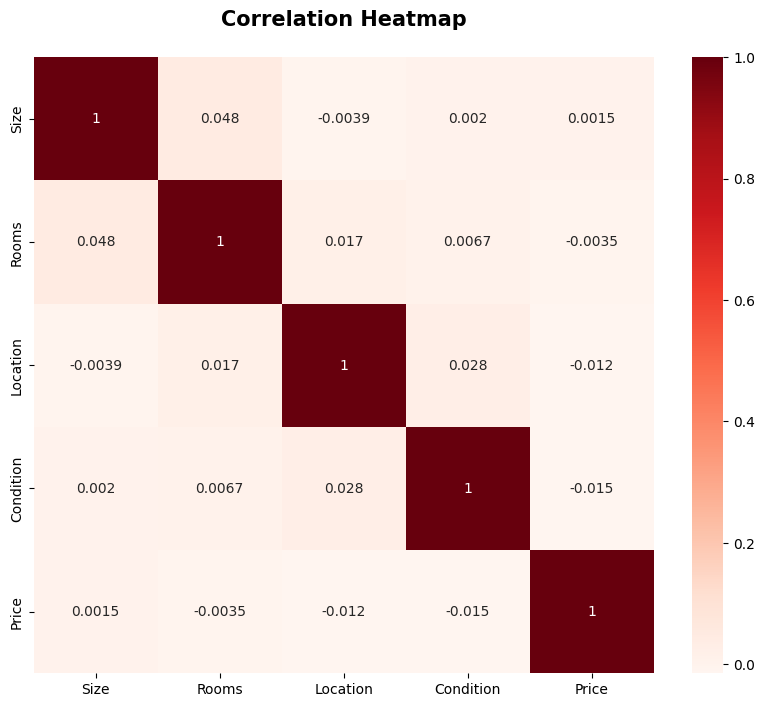

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title('Correlation Heatmap\n', fontweight='bold', fontsize=15)
plt.show()

In [24]:
# Removing features with low correlation to Price

correlation_matrix = df.corr()
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)

low_impact_features = correlation_with_price[abs(correlation_with_price) < 0.01].index
df = df.drop(columns=low_impact_features)
df

,Location,Condition,Price
0,0,0,-0.811135
1,0,0,-0.238039
2,0,2,-0.567739
3,2,1,-0.615086
4,0,1,0.201676
...,...,...,...
1995,2,3,-0.507584
1996,2,3,0.086825
1997,1,3,-0.129855
1998,3,0,-0.787801


# 4. Model Training

In [26]:
#  Train-Test Split

X = df[['Location', 'Condition']]    
y = df['Price']                                                         # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])

Training Set Size: 1600
Testing Set Size: 400


In [27]:
# Train a Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-0.00505951 -0.00490674]
Model Intercept: 0.008244100379276057


# 5. Model Evaluation

In [28]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

Mean Absolute Error (MAE): 0.5047386902763182
Mean Squared Error (MSE): 0.3376314275122162
R-squared Score: 0.000159862130926558


# 6. Prediction

In [29]:
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
results_df.head()

,Actual Price,Predicted Price
1860,-0.051022,-0.011841
353,0.322929,-0.011841
1333,-0.985189,-0.006934
905,0.231233,-0.001569
1289,-0.658285,-0.001569


In [30]:
print('Difference between Predicted and Actual prices')
difference = pd.DataFrame(results_df['Predicted Price'].round(0) - results_df['Actual Price'].round(0))
difference.head()

Difference between Predicted and Actual prices


,0
1860,0.0
353,-0.0
1333,1.0
905,-0.0
1289,1.0
